In [1]:
import os
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.models as models

In [3]:
# Preprocessing the Data
transform = transforms.Compose([
    transforms.Resize((224, 224)),      # Resizing images to 224x224
    transforms.ToTensor(),               # Converting images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing images
])

# Define data directory
data_directory = 'flickr_images/'

# Load the dataset
ani_bird_aqua_dataset = ImageFolder(data_directory, transform=transform)

FileNotFoundError: Found no valid file for the classes aeroplane. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [11]:
# Divivding the Training and Testing sets
dataset_size = len(ani_bird_aqua_dataset)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

train_dataset, test_dataset = random_split(ani_bird_aqua_dataset, [train_size, test_size])

# Data loaders for training and testing sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [12]:
# Adding some more transformations as a part of preprocessing
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
])

# Applying transformations to the datasets
train_dataset.transform = train_transform

IndexError: list index out of range

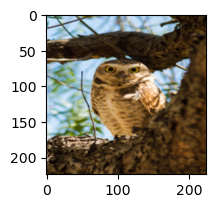

In [14]:
# Displaying the first 10 images and labels from the training dataset
images, labels = [], []
for i in range(10):
    image, label = train_dataset[i]
    images.append(image)
    labels.append(label)

# Reversing the Transformations that I have done above
images = torch.stack(images).numpy()  # Converting PyTorch tensor to numpy array
images = np.transpose(images, (0, 2, 3, 1))  # Change shape from (N, C, H, W) to (N, H, W, C)
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
images = np.clip(std * images + mean, 0, 1)  # Unnormaliz ingimages

# My custom dataset consists of these Classes
class_names = ['Aquatic animals', 'Birds','Wild animals' ]

# Plotting the images
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.show()

In [1]:
import flickrapi
import requests
import os
from urllib.parse import urlparse

API_KEY = 'c3439841b70344bfd638050619e6c5aa'
API_SECRET = '17cfd01b4e2e6a5a'

flickr = flickrapi.FlickrAPI(API_KEY, API_SECRET, format='parsed-json')

def download_images(query, target_num_images, download_dir):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    page = 1
    downloaded_images = 0

    while downloaded_images < target_num_images:
        photos = flickr.photos.search(text=query, per_page=500, page=page, media='photos', sort='relevance', extras='url_o')
        photo_list = photos['photos']['photo']
        
        if not photo_list:
            print("No more images available in the search. Ending process.")
            break
        
        for photo in photo_list:
            if downloaded_images >= target_num_images:
                break 
            try:
                url = photo['url_o']
                img_name = os.path.basename(urlparse(url).path)
                img_path = os.path.join(download_dir, img_name)
                
                response = requests.get(url, stream=True)
                if response.status_code == 200:
                    with open(img_path, 'wb') as f:
                        f.write(response.content)
                    print(f"Downloaded {img_name}")
                    downloaded_images += 1
                else:
                    print(f"Failed to download {img_name} (HTTP {response.status_code})")
            except KeyError:
                print(f"No original size available for image ID {photo['id']}")
        
        page += 1  

    print(f"Total downloaded images: {downloaded_images}/{target_num_images}")

query = "penguins" 
target_num_images = 250  
download_dir = "flickr_images/penguins" 

download_images(query, target_num_images, download_dir)

Downloaded 4542144950_1f162a4860_o.jpg
Downloaded 11252734466_3b86d99599_o.jpg
No original size available for image ID 16595334712
Downloaded 2350060619_5ee6dce905_o.jpg
Downloaded 5851526974_5ac436525c_o.jpg
Downloaded 5446090785_d226857ffc_o.jpg
Downloaded 415875522_4d26e2e847_o.jpg
Downloaded 105752398_07df61fa45_o.jpg
Downloaded 4519044604_58852c51e9_o.jpg
Downloaded 6814505749_fa21d09571_o.jpg
Downloaded 4688219616_c52ed18ac6_o.jpg
Downloaded 5304620496_81c8cc92b0_o.jpg
Downloaded 4066151786_a8297119c1_o.jpg
No original size available for image ID 5498627731
No original size available for image ID 3421520581
Downloaded 19554727_7a3efc8a0e_o.jpg
Downloaded 1075130101_3e3b2b3725_o.jpg
Downloaded 6203132170_1717635b9c_o.jpg
Downloaded 12455683743_604f9d84ed_o.jpg
Downloaded 5935971135_ff4e351802_o.jpg
Downloaded 6910130675_8fe2a08a6e_o.jpg
No original size available for image ID 14114750902
No original size available for image ID 4103955411
Downloaded 5998740135_893afe13de_o.jpg
No o

In [2]:
import flickrapi
import requests
import os
from urllib.parse import urlparse

API_KEY = 'c3439841b70344bfd638050619e6c5aa'
API_SECRET = '17cfd01b4e2e6a5a'

flickr = flickrapi.FlickrAPI(API_KEY, API_SECRET, format='parsed-json')

def download_images(query, target_num_images, download_dir):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    page = 1
    downloaded_images = 0

    while downloaded_images < target_num_images:
        photos = flickr.photos.search(text=query, per_page=500, page=page, media='photos', sort='relevance', extras='url_o')
        photo_list = photos['photos']['photo']
        
        if not photo_list:
            print("No more images available in the search. Ending process.")
            break
        
        for photo in photo_list:
            if downloaded_images >= target_num_images:
                break 
            try:
                url = photo['url_o']
                img_name = os.path.basename(urlparse(url).path)
                img_path = os.path.join(download_dir, img_name)
                
                response = requests.get(url, stream=True)
                if response.status_code == 200:
                    with open(img_path, 'wb') as f:
                        f.write(response.content)
                    print(f"Downloaded {img_name}")
                    downloaded_images += 1
                else:
                    print(f"Failed to download {img_name} (HTTP {response.status_code})")
            except KeyError:
                print(f"No original size available for image ID {photo['id']}")
        
        page += 1  

    print(f"Total downloaded images: {downloaded_images}/{target_num_images}")

query = "owl" 
target_num_images = 250  
download_dir = "flickr_images/owl" 

download_images(query, target_num_images, download_dir)

Downloaded 6976350180_d94cf01095_o.jpg
No original size available for image ID 33445903392
Downloaded 5359592495_5ca7f1a70c_o.jpg
Downloaded 9298204829_3b2eb1f443_o.jpg
No original size available for image ID 2982892322
Downloaded 6022297293_84e03a5cc4_o.jpg
Downloaded 10837709536_d3ef57b542_o.jpg
No original size available for image ID 36312439511
Downloaded 6019531241_76bac22477_o.jpg
Downloaded 14608670667_2ce10ebd54_o.jpg
No original size available for image ID 8471001317
Downloaded 10941333604_bd8daca980_o.jpg
Downloaded 12340328703_ba4b6055d3_o.jpg
Downloaded 7263500272_bf3ba282bb_o.jpg
Downloaded 3514419529_350cf9f018_o.jpg
Downloaded 4868838307_86bb33fe95_o.jpg
Downloaded 4701718142_b8d263bba7_o.jpg
Downloaded 6070396604_80e577fb79_o.jpg
Downloaded 15109075955_cf1cc92048_o.jpg
Downloaded 223990488_db95e47f47_o.jpg
Downloaded 1314069826_5de7cbde10_o.jpg
Downloaded 5650643621_cc5c1126cf_o.jpg
No original size available for image ID 32871951514
No original size available for image

In [3]:
import flickrapi
import requests
import os
from urllib.parse import urlparse

API_KEY = 'c3439841b70344bfd638050619e6c5aa'
API_SECRET = '17cfd01b4e2e6a5a'

flickr = flickrapi.FlickrAPI(API_KEY, API_SECRET, format='parsed-json')

def download_images(query, target_num_images, download_dir):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    page = 1
    downloaded_images = 0

    while downloaded_images < target_num_images:
        photos = flickr.photos.search(text=query, per_page=500, page=page, media='photos', sort='relevance', extras='url_o')
        photo_list = photos['photos']['photo']
        
        if not photo_list:
            print("No more images available in the search. Ending process.")
            break
        
        for photo in photo_list:
            if downloaded_images >= target_num_images:
                break 
            try:
                url = photo['url_o']
                img_name = os.path.basename(urlparse(url).path)
                img_path = os.path.join(download_dir, img_name)
                
                response = requests.get(url, stream=True)
                if response.status_code == 200:
                    with open(img_path, 'wb') as f:
                        f.write(response.content)
                    print(f"Downloaded {img_name}")
                    downloaded_images += 1
                else:
                    print(f"Failed to download {img_name} (HTTP {response.status_code})")
            except KeyError:
                print(f"No original size available for image ID {photo['id']}")
        
        page += 1  

    print(f"Total downloaded images: {downloaded_images}/{target_num_images}")

query = "Hen" 
target_num_images = 250  
download_dir = "flickr_images/Hens" 

download_images(query, target_num_images, download_dir)

Downloaded 52678631815_5bccb57ef8_o.jpg
Downloaded 25750778235_99174a8d94_o.jpg
Downloaded 52687294524_89dde44ed4_o.jpg
Downloaded 48212494302_8185fa1f2e_o.jpg
Downloaded 3754566613_92182cf95f_o.jpg
No original size available for image ID 51186698876
Downloaded 2844376952_a2c21d59c8_o.jpg
Downloaded 36897897766_7cc2780843_o.jpg
No original size available for image ID 16086692860
Downloaded 6391550203_227b8cf3b2_o.jpg
Downloaded 82567451_1448ff854b_o.jpg
Downloaded 2648766940_01b7374b64_o.jpg
Downloaded 52219751269_9dcb3ed253_o.jpg
Downloaded 4889529401_0fb5d29b69_o.jpg
Downloaded 50856630883_51550039ec_o.jpg
Downloaded 4889531267_7ca1614100_o.jpg
Downloaded 5066724844_e8779e6ebe_o.jpg
No original size available for image ID 19545295684
No original size available for image ID 6077449911
No original size available for image ID 52529082226
Downloaded 4424797259_05a42b4308_o.jpg
No original size available for image ID 51489117806
Downloaded 6251372242_536f122f5f_o.jpg
Downloaded 5137700084

In [5]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

train_transform = transforms.Compose([
    transforms.Resize((128, 128)),                
    transforms.RandomHorizontalFlip(p=0.5),                
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), 
    transforms.ToTensor(),                         
    transforms.Normalize((0.5,), (0.5,))           
])
test_transform = transforms.Compose([
    transforms.Resize((128, 128)),                 
    transforms.ToTensor(),                         
    transforms.Normalize((0.5,), (0.5,))           
])

def is_valid_file(path):
    return path.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))

def find_classes(directory):
    classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
    classes.sort()
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

class CustomImageFolder(datasets.ImageFolder):
    def find_classes(self, directory):
        return find_classes(directory)

dataset = CustomImageFolder(root='/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assingment 3/flickr_images/', transform=train_transform, is_valid_file=is_valid_file)

labels = [sample[1] for sample in dataset.samples]

train_indices, test_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, stratify=labels, random_state=42)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Training set size: {len(train_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 1239
Test set size: 310


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64 * 32 * 32, out_features=128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(in_features=128, out_features=3)
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the tensor
        x = self.dropout(nn.ReLU()(self.fc1(x)))
      
        x = self.fc2(x)
        return x

model = SimpleCNN()

criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.0001)

In [7]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() 
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
    model.eval() 
    correct = 0
    total = 0
    
    with torch.no_grad():  
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Accuracy on the test set after epoch {epoch+1}: {100 * correct / total:.2f}%")

IndexError: Target 6 is out of bounds.

True Labels: owls hens hens penguins


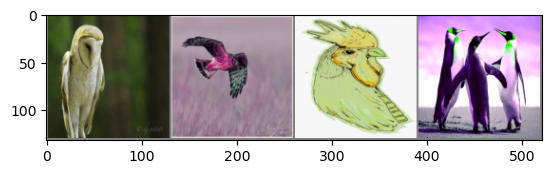

Predicted Labels: owls hens owls penguins


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import random  

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
classes = dataset.classes

random_indices = random.sample(range(len(test_dataset)), 4)  

random_images = [test_dataset[i][0] for i in random_indices]  
random_labels = [test_dataset[i][1] for i in random_indices]  

random_images_tensor = torch.stack(random_images)

print('True Labels:', ' '.join(f'{classes[random_labels[j]]}' for j in range(4)))
imshow(torchvision.utils.make_grid(random_images_tensor)) 

model.eval()  
outputs = model(random_images_tensor)  
_, predicted = torch.max(outputs, 1)

print('Predicted Labels:', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

googlenet = models.googlenet(pretrained=True)

for param in googlenet.parameters():
    param.requires_grad = False  # Freeze all layers except the last

googlenet.fc = nn.Linear(1024, 3)  # 1024 is the input size of GoogLeNet's final layer

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(googlenet.fc.parameters(), lr=0.001)

print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
num_epochs = 20 

for epoch in range(num_epochs):
    googlenet.train()  # Set the model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = googlenet(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize the final layer
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    googlenet.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad(): 
        for images, labels in test_loader:
            outputs = googlenet(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Accuracy on the test set after epoch {epoch+1}: {100 * correct / total:.2f}%")

Epoch [1/20], Loss: 0.8354
Accuracy on the test set after epoch 1: 88.67%
Epoch [2/20], Loss: 0.4852
Accuracy on the test set after epoch 2: 90.00%
Epoch [3/20], Loss: 0.3606
Accuracy on the test set after epoch 3: 90.00%
Epoch [4/20], Loss: 0.3279
Accuracy on the test set after epoch 4: 89.33%
Epoch [5/20], Loss: 0.2822
Accuracy on the test set after epoch 5: 89.33%
Epoch [6/20], Loss: 0.2248
Accuracy on the test set after epoch 6: 92.00%
Epoch [7/20], Loss: 0.2117
Accuracy on the test set after epoch 7: 91.33%
Epoch [8/20], Loss: 0.1773
Accuracy on the test set after epoch 8: 90.67%
Epoch [9/20], Loss: 0.1941
Accuracy on the test set after epoch 9: 93.33%
Epoch [10/20], Loss: 0.1653
Accuracy on the test set after epoch 10: 91.33%
Epoch [11/20], Loss: 0.1536
Accuracy on the test set after epoch 11: 90.67%
Epoch [12/20], Loss: 0.1406
Accuracy on the test set after epoch 12: 92.67%
Epoch [13/20], Loss: 0.1464
Accuracy on the test set after epoch 13: 93.33%
Epoch [14/20], Loss: 0.1320
Ac

True Labels: penguins owls owls hens


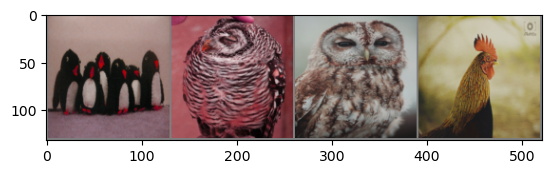

Predicted Labels: penguins owls owls hens


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import random  

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
classes = dataset.classes

random_indices = random.sample(range(len(test_dataset)), 4) 

random_images = [test_dataset[i][0] for i in random_indices] 
random_labels = [test_dataset[i][1] for i in random_indices]  

random_images_tensor = torch.stack(random_images)

print('True Labels:', ' '.join(f'{classes[random_labels[j]]}' for j in range(4)))
imshow(torchvision.utils.make_grid(random_images_tensor))  

googlenet.eval()  
outputs = googlenet(random_images_tensor)  
_, predicted = torch.max(outputs, 1)

print('Predicted Labels:', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))
